# Customer Clustering

<hr>

## Imports

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [120]:
df = pd.read_csv("customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Preprocessing Data

In [121]:
from sklearn.preprocessing import LabelEncoder

df = df.drop("CustomerID", axis=1)
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Standardizing Data

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
standardData = scaler.transform(df)

standardData[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

## Elbow Method to Choose K

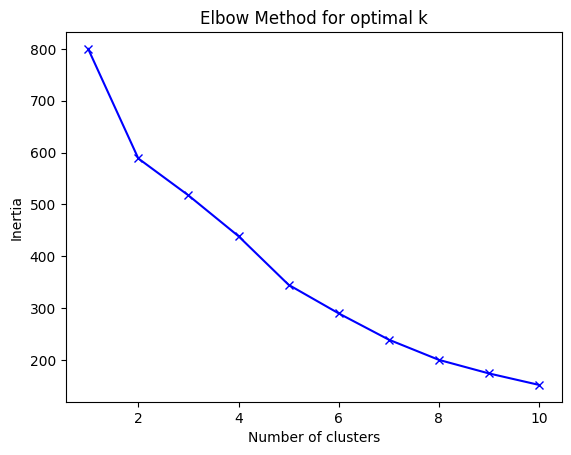

In [123]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=40)
    km.fit(standardData)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal k')
plt.show()

## Silhouette Method to Choose K

In [124]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=40)
    labels = km.fit_predict(standardData)
    score = silhouette_score(standardData, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.252
k=3, silhouette score=0.223
k=4, silhouette score=0.253
k=5, silhouette score=0.301
k=6, silhouette score=0.330


## K-Means Clustering

In [125]:
from sklearn.cluster import KMeans

k = 5
k_means = KMeans(n_clusters=k, init="k-means++", n_init=12, random_state=40)
k_means.fit(standardData)

labels = k_means.labels_
centers = k_means.cluster_centers_

print(f"Labels: {labels[:10]}")
print(f"Centers: {centers}")

df["K-Means Cluster"] = labels
df.head()

Labels: [0 0 4 4 4 4 4 4 3 4]
Centers: [[ 1.12815215 -0.77111419 -0.08465578  0.8197479 ]
 [-0.88640526  0.75798289  0.0706808  -0.52766874]
 [-0.71122636 -0.48536124  1.12370799  1.21089512]
 [ 1.12815215  0.75982983  0.07086791 -0.81492926]
 [-0.88640526 -0.86658278 -0.74086862  0.17566756]]


,Gender,Age,Annual Income (k$),Spending Score (1-100),K-Means Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


## Insights

In [126]:
cluster_summary = df.groupby("K-Means Cluster").mean()
print(cluster_summary)

                   Gender        Age  Annual Income (k$)  \
K-Means Cluster                                            
0                1.000000  28.105263           58.342105   
1                0.000000  49.411765           62.411765   
2                0.086957  32.086957           90.000000   
3                1.000000  49.437500           62.416667   
4                0.000000  26.775000           41.150000   

                 Spending Score (1-100)  
K-Means Cluster                          
0                             71.315789  
1                             36.607843  
2                             81.391304  
3                             29.208333  
4                             54.725000  


## Plot

Text(0, 0.5, 'Annual Income')

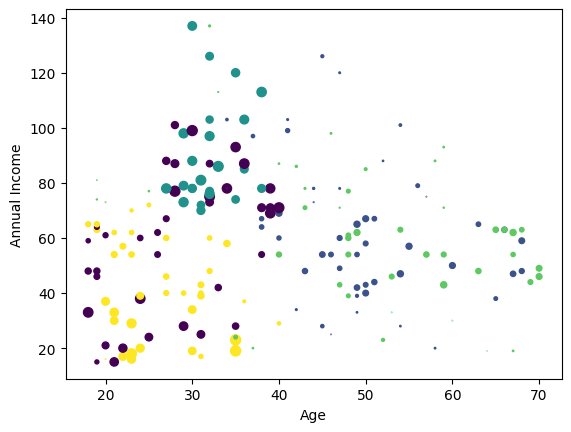

In [127]:
scores = df["Spending Score (1-100)"]
areas = np.pi * ((scores / 24) ** 2)

plt.scatter(df["Age"], df["Annual Income (k$)"], s=areas, c=labels.astype(np.float64))
plt.xlabel("Age")
plt.ylabel("Annual Income")

## 3D Plot

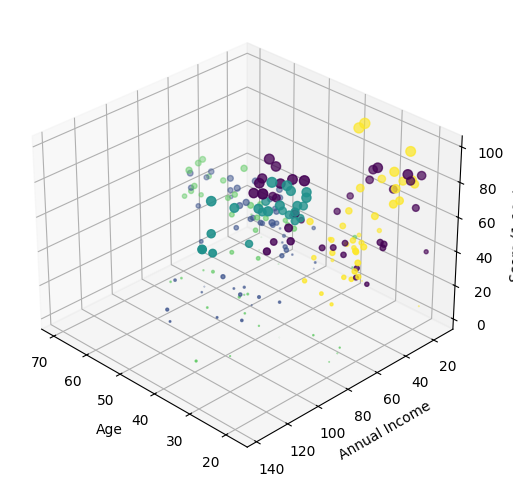

In [128]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=30, azim=135)

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], s=areas, c=labels.astype(np.float64))
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Score (1-100)")

plt.show()

<hr>

# Hierarchical Clustering

## Reading and Cleaning Data

In [129]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("customer.csv")
print(df.columns)

df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df.head()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Scaling Data

In [130]:
from sklearn.preprocessing import MinMaxScaler

x = df.values
scaler = MinMaxScaler().fit(x)
scaled_x = scaler.transform(x)
print(x[:2], "\n")
print(scaled_x[:2])

[[ 1 19 15 39]
 [ 1 21 15 81]] 

[[1.         0.01923077 0.         0.3877551 ]
 [1.         0.05769231 0.         0.81632653]]


## Complete Linkage Clustering

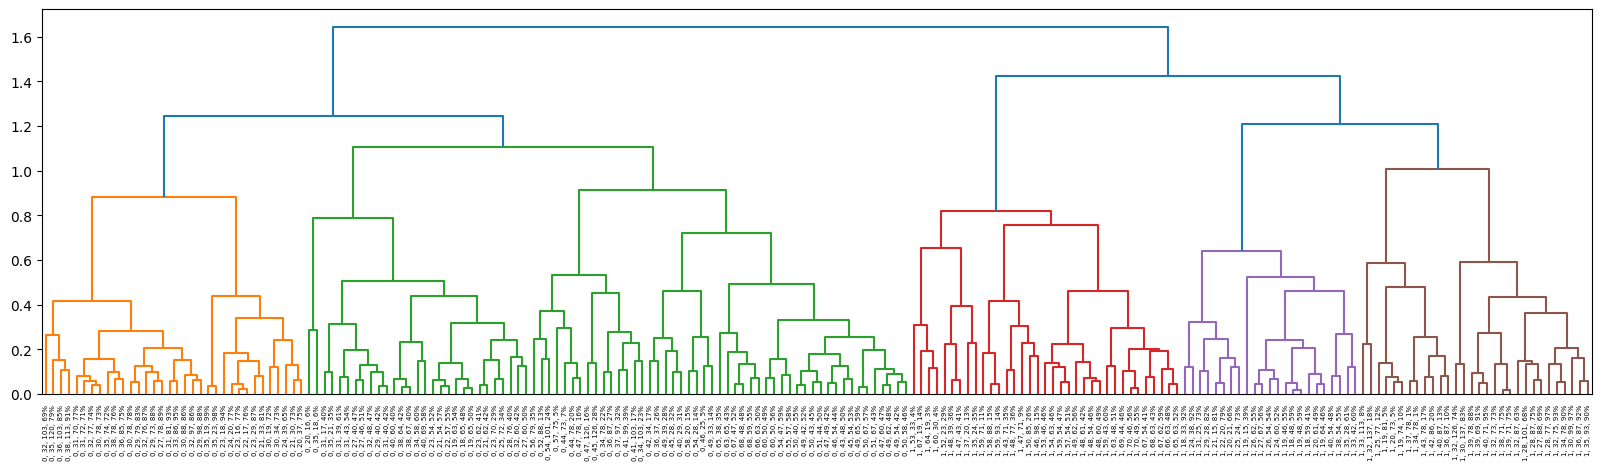

In [131]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

dist_matrix = distance_matrix(scaled_x, scaled_x)
condensed_dist = squareform(dist_matrix, checks=False)

Z = hierarchy.linkage(condensed_dist, method="complete")

plt.figure(figsize=(20, 5))
hierarchy.dendrogram(Z, leaf_label_func=(lambda id: f"{df['Gender'][id]}, {df['Age'][id]}, {df['Annual Income (k$)'][id]}, {df['Spending Score (1-100)'][id]}%"))
plt.show()

## Flat Clustering: "distance"

In [132]:
from scipy.cluster.hierarchy import fcluster

max_d = 2
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## Flat Clustering: "maxclust"

In [133]:
from scipy.cluster.hierarchy import fcluster

k = 5
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([4, 4, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 4, 2, 4, 3, 1, 3, 4,
       2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 3, 4, 2, 1, 2, 1, 2, 1, 2, 4, 3, 2,
       2, 1, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2, 2, 3, 4,
       2, 2, 4, 2, 3, 2, 2, 2, 3, 4, 2, 4, 2, 2, 3, 4, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 4, 3, 2, 2, 4, 2, 2, 3, 4, 2, 2, 3, 4, 3, 2, 2, 3, 3, 3,
       3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 5, 2, 1, 3, 5, 3, 5, 3, 5,
       2, 1, 5, 1, 2, 5, 5, 1, 2, 5, 2, 1, 5, 5, 3, 1, 2, 5, 5, 5, 2, 1,
       2, 1, 5, 1, 5, 1, 2, 1, 5, 1, 3, 1, 5, 1, 2, 5, 5, 5, 5, 5, 2, 1,
       3, 5, 3, 5, 2, 1, 3, 1, 2, 5, 2, 5, 2, 1, 2, 1, 5, 1, 2, 1, 2, 5,
       5, 5], dtype=int32)

## Hierarchical Clustering With Scikit-Learn

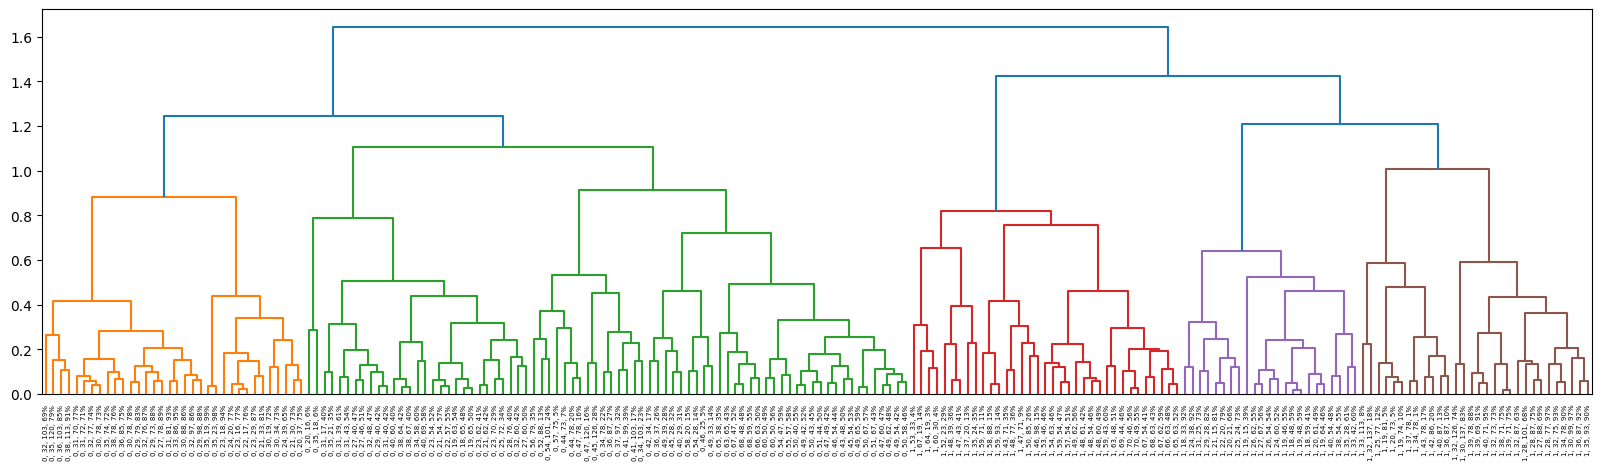

In [134]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

dist_matrix = euclidean_distances(scaled_x, scaled_x)
condensed_dist = squareform(dist_matrix, checks=False)

Z = hierarchy.linkage(condensed_dist, method="complete")

plt.figure(figsize=(20, 5))
hierarchy.dendrogram(Z, leaf_label_func=(lambda id: f"{df['Gender'][id]}, {df['Age'][id]}, {df['Annual Income (k$)'][id]}, {df['Spending Score (1-100)'][id]}%"))
plt.show()

## Agglomerative Clustering

In [135]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering

dist_matrix = euclidean_distances(scaled_x, scaled_x)

clusters_count = 6
agglomerative_clustering = AgglomerativeClustering(n_clusters=clusters_count, metric="precomputed", linkage="complete")
agglomerative_clustering.fit(dist_matrix)

df["cluster_label"] = agglomerative_clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,19,15,39,4
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5


## Visualization

Text(0, 0.5, 'Annual Income')

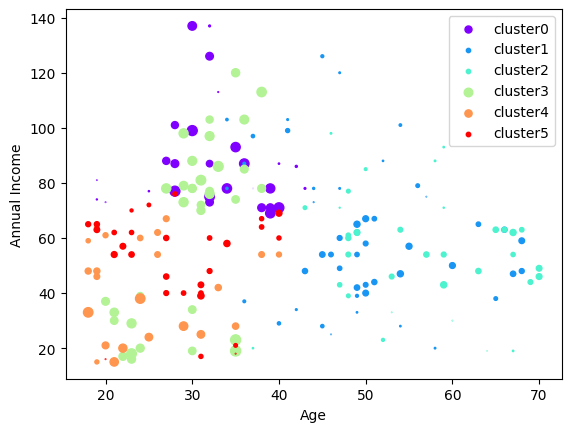

In [136]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, clusters_count))
cluster_labels = list(range(0, clusters_count))

for label, color in zip(cluster_labels, colors):
    subset = df[df["cluster_label"] == label]

    scores = subset["Spending Score (1-100)"]
    areas = np.pi * ((scores / 24) ** 2)
    
    plt.scatter(subset["Age"], subset["Annual Income (k$)"], s=areas, color=color, label=("cluster" + str(label)))

plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income")

## Classification

In [137]:
labels_count = df.groupby(["cluster_label"])["cluster_label"].count()
print(labels_count)

means = df.groupby(["cluster_label"])[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
means

cluster_label
0    30
1    49
2    35
3    34
4    23
5    29
Name: cluster_label, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster_label,,,,
0,1.0,32.633333,87.233333,53.600000
1,0.0,49.795918,61.000000,35.591837
2,1.0,55.800000,54.085714,35.257143
3,0.0,29.617647,62.970588,81.235294
4,1.0,24.826087,42.000000,62.043478
5,0.0,28.275862,51.931034,43.620690


<hr>

# DBSCAN Clustering

## Reading Data

In [138]:
df = pd.read_csv("customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Preprocessing Data

In [139]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

encoder = LabelEncoder().fit(df["Gender"])
df["Gender"] = encoder.transform(df["Gender"])

check_random_state(1000)

scaler = StandardScaler().fit(df)
scaled_df = scaler.transform(df)
scaled_df[:2]

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407]])

## DBSCAN Clustering

In [140]:
from sklearn.cluster import DBSCAN

eps = 0.8
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_df)

labels = dbscan.labels_
df["Cluster Label"] = labels

labels

array([-1,  0, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1, -1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3,  1,  1,  2,  3,  1,  1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1,  1,  2,  2,  2,  2,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  4,  1,  1,  2,  4, -1,  4,  6,  4,  1,  1,  5,  1,
        7,  4,  5,  1, -1,  4,  1,  1,  5,  4,  6,  1,  7,  4,  6,  4,  7,
        1,  7,  1,  6,  1,  6,  1, -1,  1,  5,  1,  6,  1,  6,  1,  7,  8,
        6,  8,  6,  4,  7,  1,  6,  8, -1,  4,  7,  1,  6,  1,  7,  4, -1,
        8,  7,  1,  7,  1, -1,  1,  7,  1, -1, -1, -1, -1])

## Visualization

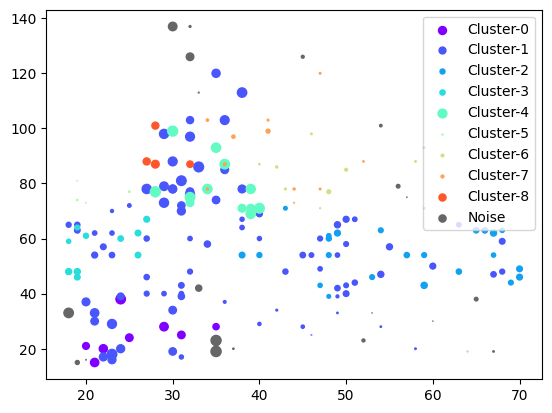

In [148]:
import matplotlib.cm as  cm

labels = list(set(labels))
colors = cm.rainbow(np.linspace(0, 1, len(labels)))

for label, color in zip(labels, colors):
    data_set = df[df["Cluster Label"] == label]

    scores = data_set["Spending Score (1-100)"]
    areas = np.pi * ((scores / 24) ** 2)

    if label == -1:
        color = [(0.4, 0.4, 0.4)]
    
    cluster_label = f"Cluster-{label}" if label != -1 else "Noise"
    plt.scatter(data_set["Age"], data_set["Annual Income (k$)"], color=color, s=areas, label=cluster_label)

plt.legend()

## 3D Plot

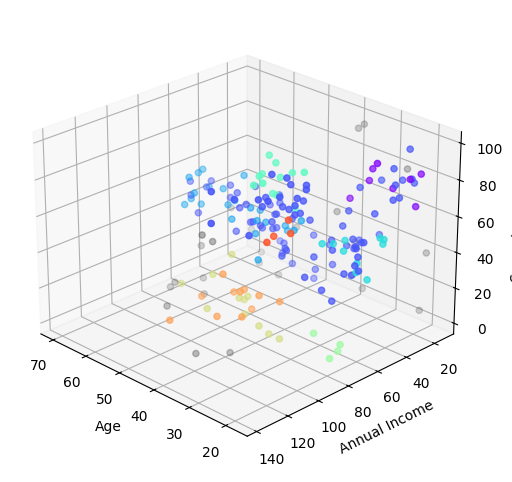

In [157]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=25, azim=135)

color_map = dict(zip(labels, colors))

if -1 in color_map:
    color_map[-1] = (0.4, 0.4, 0.4, 0.5)

point_colors = [color_map[label] for label in df["Cluster Label"]]

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=point_colors)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Score (1-100)")

plt.show()